### **Import required libraries**

In [55]:
# Import required libraries
import pandas as pd 
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression

### **Step 1 : Acquiring Data**

In [56]:
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')

### **Step 2 : EDA on the Data**

In [57]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [59]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [60]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
train_df.shape

(891, 12)

In [62]:
# All numeric (float and int) variables in the dataset
train_df_numeric = train_df.select_dtypes(include=['float64', 'int64'])
train_df_numeric.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [63]:
# Correlation matrix
cor = train_df_numeric.corr()
cor

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


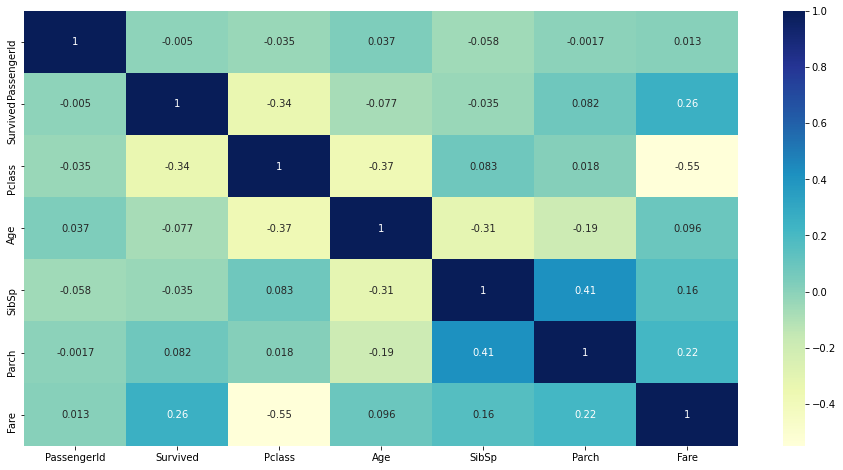

In [64]:
# Figure size
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

### ** Step 3 : Data Cleaning **

In [65]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


There are some null values in the dataset those needs to be treated before building the model.

The operations needs to be performed on both training and testing data sets. Hence merging both data set to get a new dataset.

In [66]:
full_dataset = [train_df, test_df]

In [67]:
# Sex is a binary value column.
# Hence making female as 0 and male as 1
sex_dict = {"female":0, "male":1}
for data_df in full_dataset:
    data_df['Sex'] = data_df['Sex'].apply(lambda x:sex_dict[x])

#### **Name**

Name column contains titles.
Separating the titles from name and then converting them.

In [68]:
for data_df in full_dataset:
    data_df['Title']  = data_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    data_df['Title'] = data_df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Royalty')

    data_df['Title'] = data_df['Title'].replace('Mlle', 'Miss')
    data_df['Title'] = data_df['Title'].replace('Ms', 'Miss')
    data_df['Title'] = data_df['Title'].replace('Mme', 'Mrs')

    
title_dict = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royalty": 5}
for data_df in full_dataset: 
    data_df['Title'] = data_df['Title'].apply(lambda x: title_dict[x])
    data_df['Title'] = data_df['Title'].fillna(0)

### **Age**

This column has multiple null values.

Filling the null values and classifying the age based on the group.

In [69]:
def AgeGroup(age):
    if(age <= 16):
        return 0 
    elif age > 16 and age <= 32:
        return 1
    elif age>32 and age <=48:
        return 2 
    elif age>48 and age <= 64:
        return 3
    else:
        return 4
    
for data_df in full_dataset:
    age_avg = data_df['Age'].mean()
    age_std = data_df['Age'].std()
    age_null_count = data_df['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    data_df['Age'][np.isnan(data_df['Age'])] = age_null_random_list
    data_df['Age'] = data_df['Age'].astype(int)
    data_df['AgeGoup'] = data_df['Age'].apply(AgeGroup)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### **SibSp and Parch**

With these features we can create a new feature called Family Size which will be helpful in checking survival ratings.

In [70]:
def Alone(familysize):
    if familysize ==1:
        return 1 
    else:
        return 0

for data_df in full_dataset:
    data_df['Family_size'] = data_df['SibSp'] + data_df['Parch'] + 1
    data_df['IsAlone'] = data_df['Family_size'].apply(Alone)

### **Embarked**

Filling the embarked column with mostly occuring values (S)

In [71]:
embarked= {'S': 0, 'C': 1, 'Q': 2}
for data_df in full_dataset:
    data_df['Embarked'] = data_df['Embarked'].fillna('S')
    data_df['Embarked'] = data_df['Embarked'].apply(lambda x: embarked[x])

In [72]:
def Cabin(cabin):
    if type(cabin) == str:
        return 1
    else:
        return 0
    
for data_df in full_dataset:
    data_df['HasCabin'] = data_df['Cabin'].apply(Cabin)

In [73]:
def FareGroup(fare):
    if fare <= 7.91:
        return 0;
    elif fare >7.91 and fare <=14.454:
        return 1
    elif fare >14.454 and fare <=31:
        return 2
    else:
        return 3

for data_df in full_dataset:
    data_df['Fare'] = data_df['Fare'].fillna(data_df['Fare'].median())
    data_df['FareGroup'] = data_df['Fare'].apply(FareGroup)

We have treated the null values and simultaneously converted the categorical columns.


In [74]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGoup,Family_size,IsAlone,HasCabin,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,0,1,1,2,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,1,3,2,2,0,1,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,1,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,0,3,2,2,0,1,3
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,0,1,2,1,1,0,1


Now dropping the columns for which dummy variables are created.

In [76]:
for data_df in full_dataset:
    data_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'],axis=1, inplace = True)

In [77]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,AgeGoup,Family_size,IsAlone,HasCabin,FareGroup
0,0,3,1,22,7.2500,0,1,1,2,0,0,0
1,1,1,0,38,71.2833,1,3,2,2,0,1,3
2,1,3,0,26,7.9250,0,2,1,1,1,0,1
3,1,1,0,35,53.1000,0,3,2,2,0,1,3
4,0,3,1,35,8.0500,0,1,2,1,1,0,1


### **Step 4 : Model Building **

In [78]:
x_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]

**Logistic Regression**

In [80]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(test_df)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


81.48

### **Step 5 : Predictions **

In [82]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": y_pred
    })
submission.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
